# **Semantic Link**

### Install Semantic Link

In [1]:
%pip install semantic-link
%load_ext sempy

StatementMeta(, 8752a98d-de4b-4a56-b953-973cb4d0c434, 8, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 164.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 170.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 101.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 132.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 212.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Configure Spark to use the Power BI Spark native connector

In [17]:
spark.conf.set("spark.sql.catalog.pbi", "com.microsoft.azure.synapse.ml.powerbi.PowerBICatalog")

StatementMeta(, 8752a98d-de4b-4a56-b953-973cb4d0c434, 25, Finished, Available)

### Query semantic model with Spark SQL

In [20]:
%%sql
SELECT * FROM pbi.`Sample Model`.Financials LIMIT 10;

StatementMeta(, 8752a98d-de4b-4a56-b953-973cb4d0c434, 28, Finished, Available)

<Spark SQL result set with 10 rows and 13 fields>

### List semantic models in a workspace

In [2]:
import sempy.fabric as fabric
import pyspark.sql.functions as F
df_datasets = fabric.list_datasets(workspace="SQL Demo")
mydataset = df_datasets.iloc[0][0]
df_datasets

StatementMeta(, 8752a98d-de4b-4a56-b953-973cb4d0c434, 10, Finished, Available)

,Dataset Name,Dataset ID,Created Timestamp,Last Update
0,DemoLakehouse,7fcf55b3-bfed-4fa6-b0fb-8caf122ce1f7,2021-02-12 23:00:58,NaT
1,DemoWarehouse,ac560d26-4684-4266-be6f-3431aa88827e,2021-02-12 23:00:58,NaT
2,Sample Model,a113f7e6-8ea3-4cff-ad44-1880f111ab4e,2023-12-30 17:29:44,NaT


### Show relationships in semantic model

StatementMeta(, 8752a98d-de4b-4a56-b953-973cb4d0c434, 11, Finished, Available)

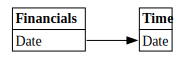

In [3]:
from sempy.relationships import plot_relationship_metadata

relationships = fabric.list_relationships("Sample Model")
plot_relationship_metadata(relationships)

### Query metadata of semantic model tables and their attributes

In [6]:
import sempy.fabric as fabric
df_dax = fabric.evaluate_dax(
    "Sample Model",
    """
    SELECT 
        MEASURE_GROUP_NAME,
        ATTRIBUTE_NAME ,
        DATATYPE ,
        DICTIONARY_SIZE ,
        DICTIONARY_ISPAGEABLE ,
        DICTIONARY_ISRESIDENT ,
        DICTIONARY_TEMPERATURE ,
        DICTIONARY_LAST_ACCESSED
    FROM $SYSTEM.DISCOVER_STORAGE_TABLE_COLUMNS 
    WHERE MEASURE_GROUP_NAME = 'Financials'
    AND DICTIONARY_SIZE > 0
    ORDER BY [DICTIONARY_TEMPERATURE] DESC
    """)
df_dax.head(20)

StatementMeta(, 8752a98d-de4b-4a56-b953-973cb4d0c434, 14, Finished, Available)

,MEASURE_GROUP_NAME,ATTRIBUTE_NAME,DATATYPE,DICTIONARY_SIZE,DICTIONARY_ISPAGEABLE,DICTIONARY_ISRESIDENT,DICTIONARY_TEMPERATURE,DICTIONARY_LAST_ACCESSED
0,Financials,Date,DBTYPE_DATE,2432,True,True,0.29454,2024-01-04 09:12:15.397
1,Financials,Profit,DBTYPE_R8,21456,True,True,0.294532,2024-01-04 09:12:15.397
2,Financials,Sales,DBTYPE_R8,21496,True,True,0.294524,2024-01-04 09:12:15.397
3,Financials,Discounts,DBTYPE_R8,20940,True,True,0.294518,2024-01-04 09:12:15.397
4,Financials,Sale Price,DBTYPE_I8,1356,True,True,0.294506,2024-01-04 09:12:15.380
5,Financials,Manufacturing Price,DBTYPE_I8,1352,True,True,0.294502,2024-01-04 09:12:15.380
6,Financials,Discount Band,DBTYPE_WSTR,17178,True,True,0.294492,2024-01-04 09:12:15.380
7,Financials,Product,DBTYPE_WSTR,17236,True,True,0.294488,2024-01-04 09:12:15.380
8,Financials,Country,DBTYPE_WSTR,17252,True,True,0.294482,2024-01-04 09:12:15.380
9,Financials,Segment,DBTYPE_WSTR,17272,True,True,0.294474,2024-01-04 09:12:15.380
